<a href="https://colab.research.google.com/github/Basit2612/PRODIGY_ML_02/blob/main/PRODIGY_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statement

Create a K-Means clustering algorithms to group customers of a retail store based on their purchase history.

Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

# Importing datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
Mall_Customers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Task2_ML-Prodigy/Mall_Customers.csv")

In [3]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
from sklearn.preprocessing import LabelEncoder
Mall_Customers["Gender"] = LabelEncoder().fit_transform(Mall_Customers["Gender"]).copy()

In [6]:
Mall_Customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Plotting Graphs


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

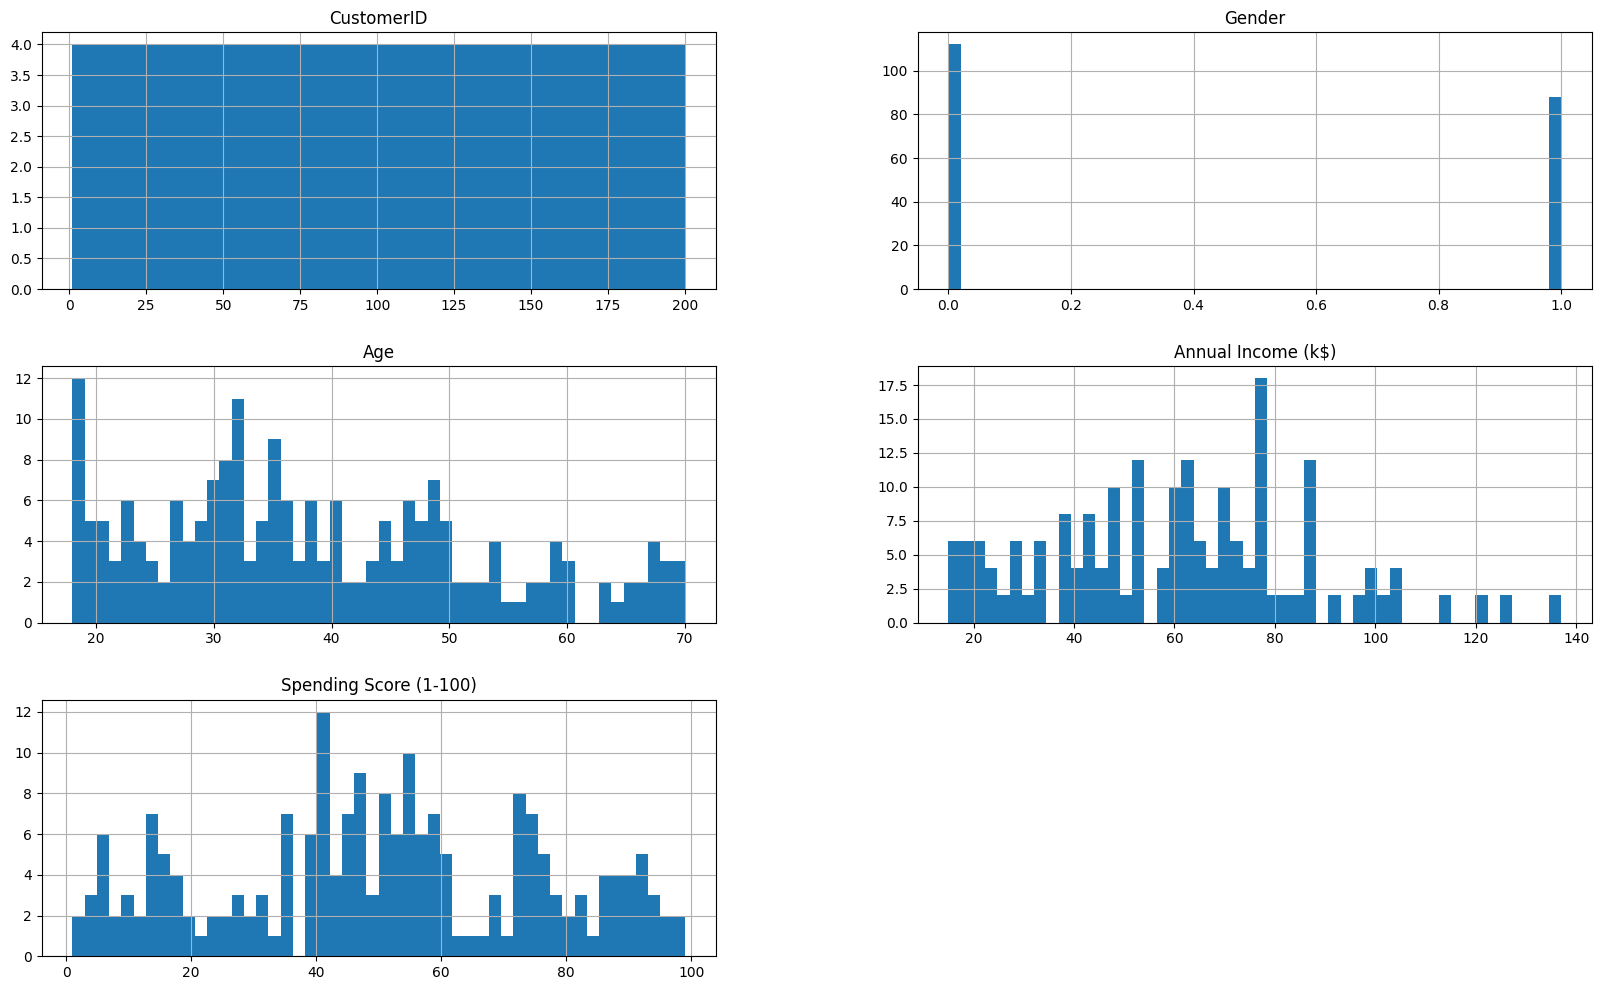

In [7]:
Mall_Customers.hist(figsize=(20,12), bins=50)

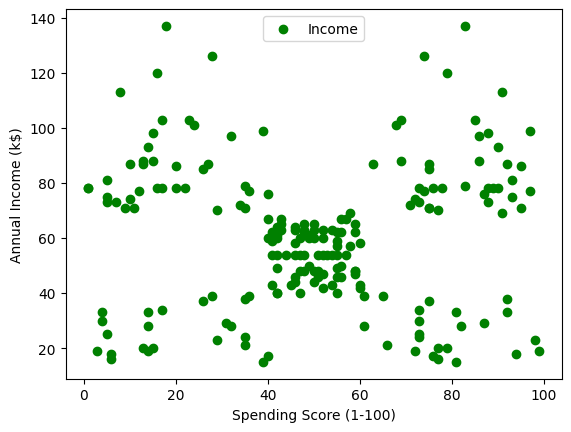

In [8]:
plt.scatter(Mall_Customers["Spending Score (1-100)"], Mall_Customers["Annual Income (k$)"], c="g", label="Income")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.legend()

# Preprocessing Datasets

In [9]:
from sklearn.preprocessing import StandardScaler
Mall_Customers_std = StandardScaler().fit_transform(Mall_Customers)
Mall_Customers_std

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

In [10]:
Mall_Customers_plot = pd.DataFrame(Mall_Customers_std, columns=Mall_Customers.columns)
Mall_Customers_plot

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


# Appropriate Value of **K**



In [11]:
Mall = Mall_Customers.drop("CustomerID", axis = 1).copy()
centers = 3 #Assume value of centers to initialize the model

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=len(Mall.index), centers=centers, n_features = len(Mall.columns))
X.shape, y.shape

max_k = 10
mean_distances = []

for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    total_distance = 0
    for i in range(k):
        cluster_points = X[labels == i]
        distance = np.linalg.norm(cluster_points - centroids[i], axis=1)
        total_distance += np.sum(distance)
    mean_distance = total_distance / len(X)
    mean_distances.append(mean_distance)
X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

array([[-5.97377927e+00, -5.61937899e+00, -5.56994789e+00,
         9.92740690e-01],
       [-1.94108688e+00, -7.47285430e+00, -9.63783847e+00,
        -1.35504327e+00],
       [-1.93768739e+00, -5.81377253e+00, -7.28977907e+00,
        -3.12945347e-01],
       [-3.14615766e+00, -4.68592419e+00, -4.59533435e+00,
         5.37063663e+00],
       [-5.56088091e+00, -6.47469670e+00, -5.63049928e+00,
         2.66491908e+00],
       [-4.24008132e+00, -3.59693574e+00, -4.13676367e+00,
         5.56857232e+00],
       [-6.82878957e+00, -6.42224265e+00, -4.31122746e+00,
         2.98646654e+00],
       [-5.85357527e+00, -3.13743952e+00, -3.97953474e+00,
         3.69834731e+00],
       [-4.69095375e+00, -2.90174254e+00, -3.37081557e+00,
         4.41116372e+00],
       [-4.96336011e+00, -5.34872458e+00, -5.67945812e+00,
         5.50481915e+00],
       [-2.96245389e+00, -3.88861558e+00, -3.39310085e+00,
         4.72053418e+00],
       [-5.97631757e+00, -8.56153253e+00, -6.38584011e+00,
      

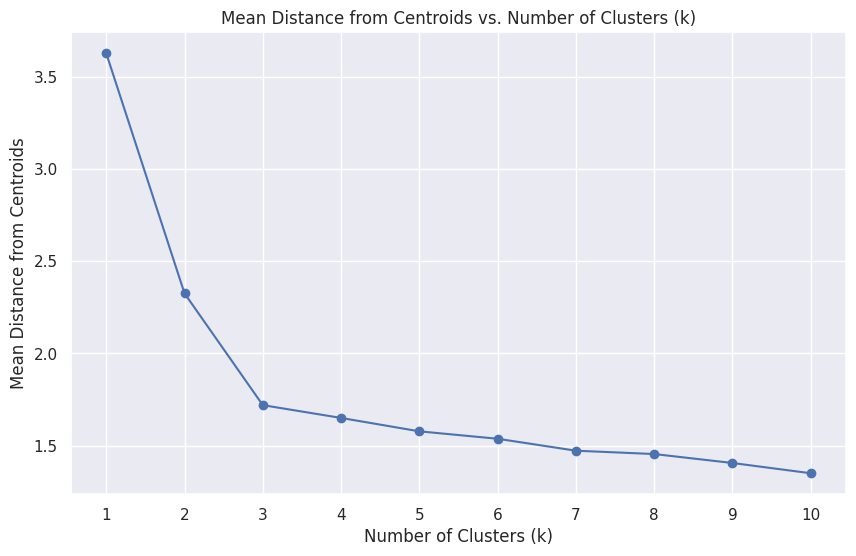

In [12]:
sns.set()
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k+1), mean_distances, marker='o', linestyle='-')
plt.title('Mean Distance from Centroids vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean Distance from Centroids')
plt.xticks(range(1, max_k+1))
plt.grid(True)
plt.show()

Alternative Method

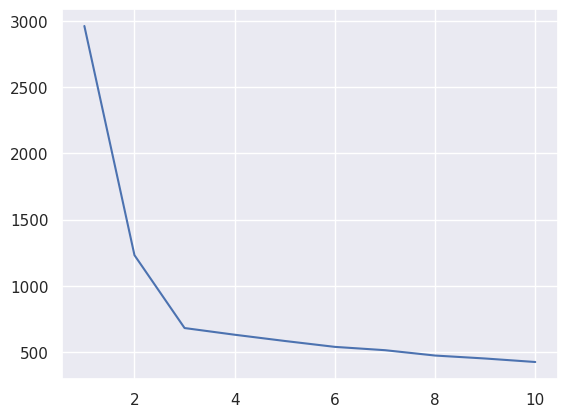

In [13]:
M = []
for i in range(1,11):
  KMEAN = KMeans(n_clusters=i, init = "k-means++", n_init = 12).fit(X)
  M.append(KMEAN.inertia_)
M
import seaborn as sns
sns.set()
plt.plot(range(1,11),M)

From the above figure shows the number of Clusters should be 3 because there is a sharp curve at K=3

# K-Means Algorithm


In [14]:
KMean = KMeans(init = "k-means++",n_clusters = 3,n_init = 12).fit(Mall_Customers_std)
KMean_labels = KMean.labels_
KMean_clusters_centers = KMean.cluster_centers_
print(f"Labels:\n{len(KMean_labels)}\nCluster Centers:\n{KMean_clusters_centers}")

Labels:
200
Cluster Centers:
[[-0.90562646 -0.20289471 -0.9286097  -0.86859989  0.33053786]
 [-0.48768665  0.05791853  1.11866328 -0.44004581 -0.39052064]
 [ 1.02408784  0.09569148 -0.24490383  0.96005657  0.08104001]]


In [15]:
Mall_Customers_std = pd.DataFrame(Mall_Customers_std)
Mall_Customers_std['labels'] = KMean_labels
Mall_Customers_std

,0,1,2,3,4,labels
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,0
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,0
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,0
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,0
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061,2
196,1.671450,-0.886405,0.441365,2.497807,-0.861839,2
197,1.688771,1.128152,-0.491602,2.497807,0.923953,2
198,1.706091,1.128152,-0.491602,2.917671,-1.250054,2


In [16]:
Mall_Customers_std.groupby("labels").mean()

,0,1,2,3,4
labels,,,,,
0,-0.905626,-0.202895,-0.928610,-0.868600,0.330538
1,-0.487687,0.057919,1.118663,-0.440046,-0.390521
2,1.024088,0.095691,-0.244904,0.960057,0.081040


In [17]:
Mall_Customers_std = np.array(Mall_Customers_std)
Mall_Customers_std.shape, Mall_Customers_std[:, 0]
Mall_Customers, Mall_Customers_std

(     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0             1       1   19                  15                      39
 1             2       1   21                  15                      81
 2             3       0   20                  16                       6
 3             4       0   23                  16                      77
 4             5       0   31                  17                      40
 ..          ...     ...  ...                 ...                     ...
 195         196       0   35                 120                      79
 196         197       0   45                 126                      28
 197         198       1   32                 126                      74
 198         199       1   32                 137                      18
 199         200       1   30                 137                      83
 
 [200 rows x 5 columns],
 array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148,
          0

# Plotting Final Results

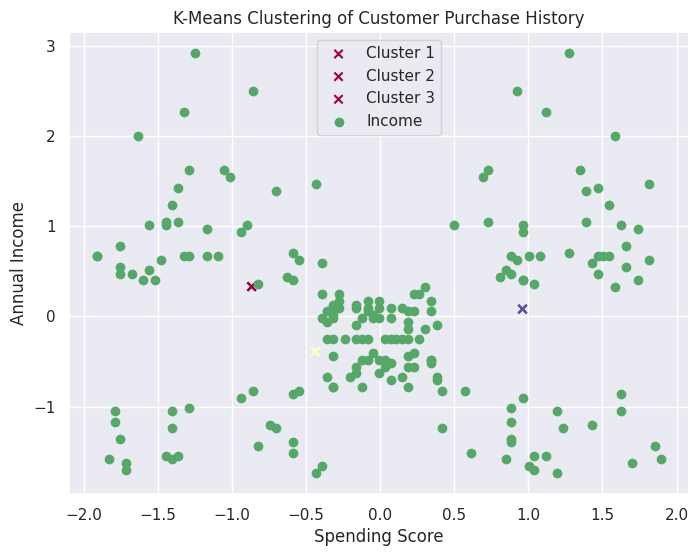

In [18]:
plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, 3))

for cluster_num in range(3):
    plt.scatter(KMean_clusters_centers[:, 3], KMean_clusters_centers[:, 4], c = colors, label=f'Cluster {cluster_num + 1}', marker ='x')

plt.scatter(Mall_Customers_plot["Spending Score (1-100)"], Mall_Customers_plot["Annual Income (k$)"], c="g", label="Income")
plt.xlabel('Spending Score')
plt.ylabel('Annual Income')
plt.title('K-Means Clustering of Customer Purchase History')
plt.legend()
plt.grid(True)
plt.show()

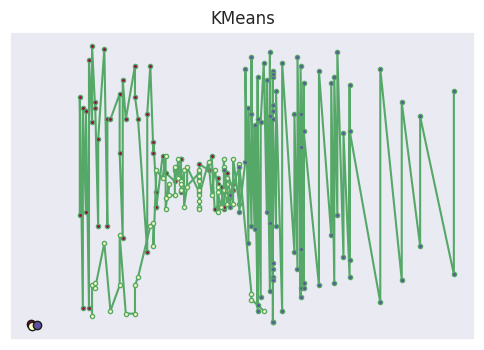

In [19]:
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(KMean_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(KMean_clusters_centers)), colors):
    my_members = (KMean_labels == k)
    cluster_center = KMean_clusters_centers[k]
    Mall_Customers = np.array(Mall_Customers)
    ax.plot(Mall_Customers[my_members, 3], Mall_Customers[my_members, 4], 'g', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[3], cluster_center[4], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()